# Exercise 2 - Introduction to (Deep) Neural Networks

This exercise uses some images and information from https://github.com/YaleATLAS/CERNDeepLearningTutorial

# Table of Contents

* [1 Introduction to Keras](#Introduction-to-Keras)
* [2 Breast cancer dataset](#Breast-cancer-dataset)
    * [Loading the dataset](#Loading-the-dataset)
    * [Plotting the dataset](#Plotting-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
* [3 Training a dense neural network](#3Training-a-dense-neural-network)
    * [Neural network model](#Neural-network-model)
    * [Build a simple neural network](#Build-a-simple-neural-network)

# 1 Introduction to Keras

  <a href='http://keras.io'><img src='https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png' style="height:100px;"></a>
 *  Modular, powerful and intuitive Deep Learning Python library built on
 <center>
 <a href='http://deeplearning.net/software/theano/'><img src='./images/theano-logo.png' style="height:50px; display:inline;"></a> and
 <a href='https://www.tensorflow.org/'><img src='./images/tf-logo.png' style="height:60px; display:inline"></a> and
 <a href='https://docs.microsoft.com/en-us/cognitive-toolkit/'><img src='https://developer.nvidia.com/sites/default/files/akamai/cuda/images/deeplearning/cntk.png' style="height:80px; display:inline"></a>
 </center>



> <i>Developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. </i>
<div align="right">
  https://keras.io
</div>

*  Minimalist, user-friendly interface
*  Extremely well documented, lots of <a href='https://github.com/fchollet/keras/tree/master/examples'>working examples</a>
*  Very shallow learning curve $\rightarrow$ by far one of the best tools for both beginners and experts
*  Open-source, developed and maintained by a community of contributors, and publicly hosted on <a href='https://github.com/fchollet/keras'>GitHub</a>
*  Extensible: possibility to customize layers
 
From the Keras website: 
<img src='./images/keras_principles.jpg' style="width:800px;">

# 2 Breast cancer dataset

## Loading the dataset

### Task 1: For this exercise we want to use the breast cancer dataset from sci-kit learn. Prepare the dataset in the following way:
* Load the dataset (`load_breast_cancer`), inspect it and create a pandas `DataFrame`.
* How many example and how many features do we have? What are the names of the classes? How many examples of each class do we have?
* Plot the mean radius and the mean smoothness of the training data in a 2D scatter plot for the two classes

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
print(breast_cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [2]:
import pandas as pd
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
import numpy as np
print('Example number, feature number:', df.shape)
print('Class Names:',list(breast_cancer.target_names))
print('Class proportions:', np.bincount(breast_cancer.target))

('Example number, feature number:', (569, 30))
('Class Names:', ['malignant', 'benign'])
('Class proportions:', array([212, 357]))


## Plotting the dataset

Text(0,0.5,u'mean smoothness')

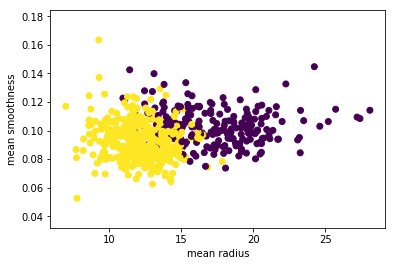

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['mean radius'], df['mean smoothness'], c=breast_cancer.target)
plt.xlabel('mean radius')
plt.ylabel('mean smoothness')

Pandas has also some nice built-in plotting features, for instance you can plot the histograms of the features:

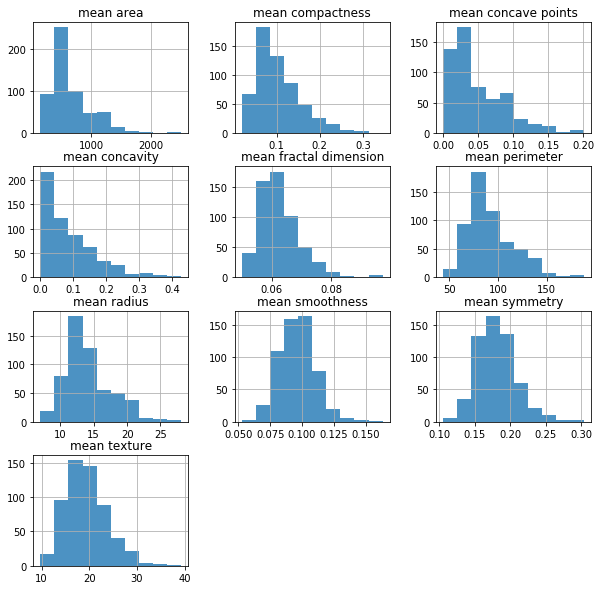

In [5]:
df[breast_cancer.feature_names[0:10]].hist(alpha=0.8, figsize=(10, 10))
plt.show()

What if we are interested in the different shape between the two classes? We could simply add the target to the DataFrame:

In [6]:
df = df.assign(target=breast_cancer.target)
df.keys()

Index([u'mean radius', u'mean texture', u'mean perimeter', u'mean area',
       u'mean smoothness', u'mean compactness', u'mean concavity',
       u'mean concave points', u'mean symmetry', u'mean fractal dimension',
       u'radius error', u'texture error', u'perimeter error', u'area error',
       u'smoothness error', u'compactness error', u'concavity error',
       u'concave points error', u'symmetry error', u'fractal dimension error',
       u'worst radius', u'worst texture', u'worst perimeter', u'worst area',
       u'worst smoothness', u'worst compactness', u'worst concavity',
       u'worst concave points', u'worst symmetry', u'worst fractal dimension',
       u'target'],
      dtype='object')

And then use the useful groupby function and plot a kernel density estimate (kde) plot: 

Text(0.5,0,u'mean radius')

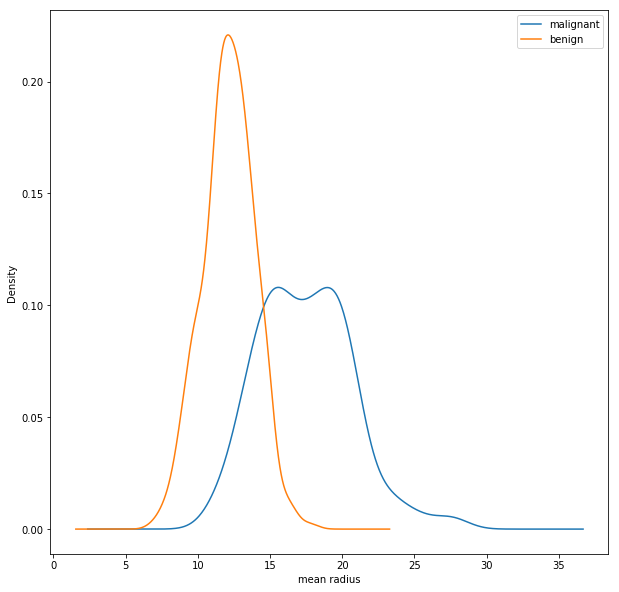

In [7]:
df.groupby("target")["mean radius"].plot(kind='kde', figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper right')
plt.xlabel('mean radius')

Similarly, we could also plot the histogram: 

Text(0.5,0,u'mean radius')

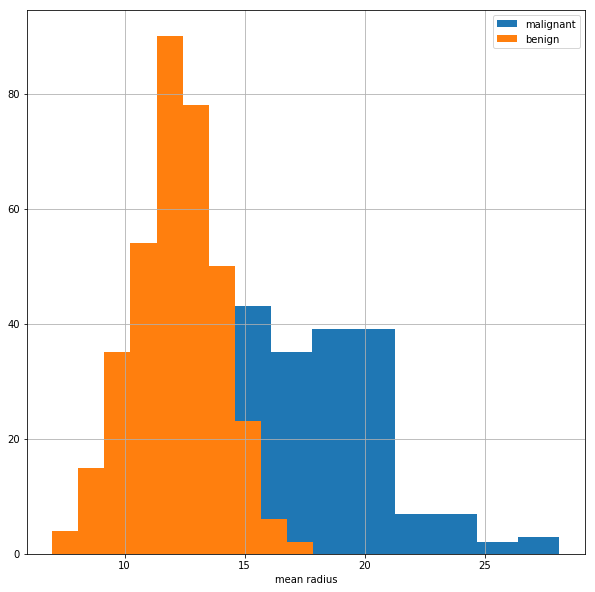

In [8]:
df.groupby("target")["mean radius"].hist(fill=False, figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper right')
plt.xlabel('mean radius')

From a DataFrame you can even plot the full scatter plot matrix:

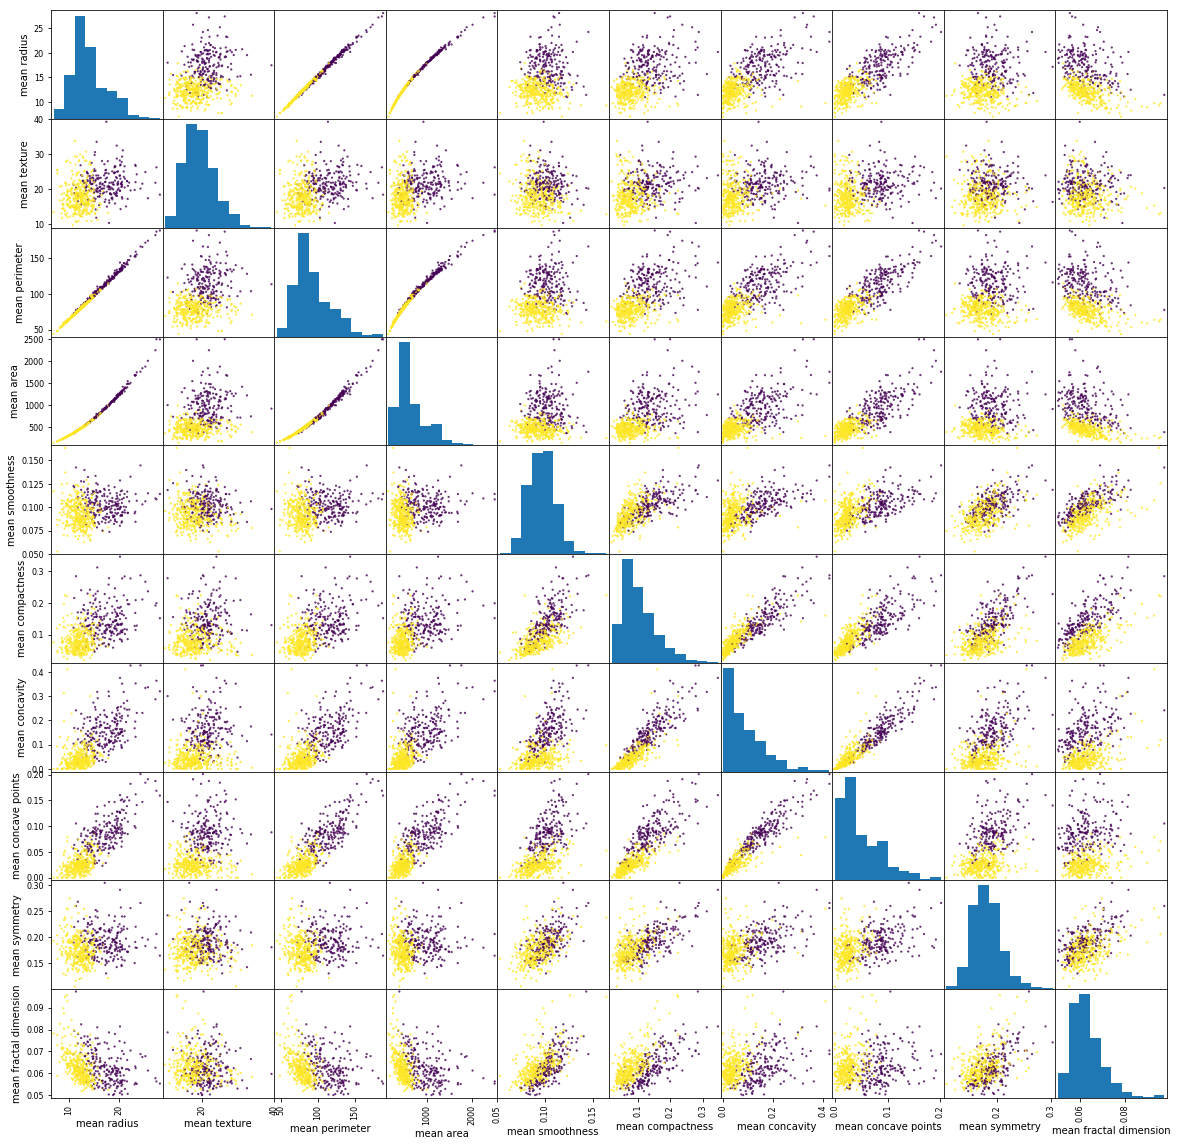

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[breast_cancer.feature_names[0:10]], c=breast_cancer.target, alpha=0.8, figsize=(20, 20), s=20)
plt.show()

Some of the input features seem highly correlated, so it usually makes sense to quantify their correlation to the other features.
We will now use seaborn: statistical data visualization to obtain the (linear) correlations between the input features.

https://seaborn.pydata.org/

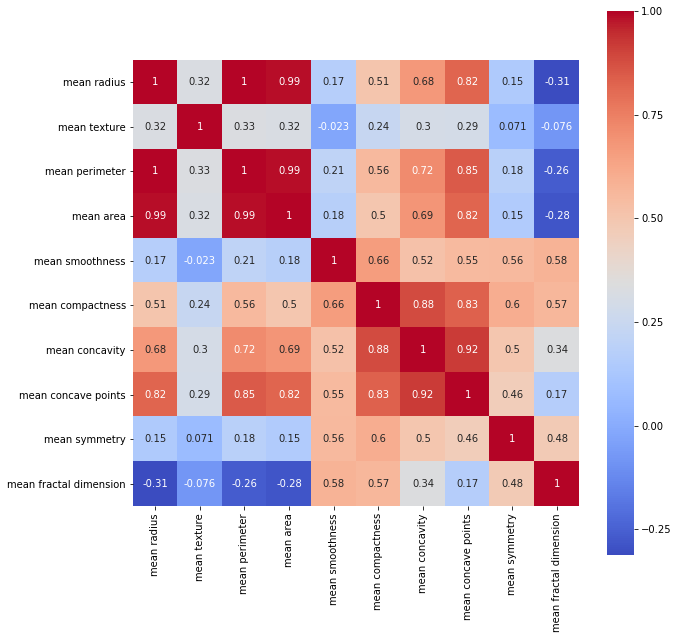

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df[breast_cancer.feature_names[0:10]].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

## Preparing the dataset

Just like scikit-learn, Keras, takes as inputs the following objects:
 *  <h3>Design matrix $X$</h3>
 an `ndarray` of dimensions `[nb_examples, nb_features]` containing the distributions to be used as inputs to the model. Each row is an object to classify, each column corresponds to a specific variable.
 *  <h3>Target vector $y$</h3>
 an `array` of dimensions `[nb_examples]` containing the truth labels indicating the class each object belongs to (for classification), or the continuous target values (for regression).
 *  <h3>Weight vector $w$</h3> 
 (optional) an `array` of dimensions `[nb_examples]` containing the weights to be assigned to each example
 
The indices of these objects must map to the same examples.

### Task 2: Create design matrix and target vector for the first 10 features. Split the data into 70% training data and 30% testing data

In [11]:
X = df[breast_cancer.feature_names[0:10]].as_matrix()
y = breast_cancer.target
print('Class proportions:', np.bincount(y))

('Class proportions:', array([212, 357]))


In [12]:
type(X)

numpy.ndarray

In [13]:
X.shape

(569, 10)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('Class proportions:', np.bincount(y_train))

('Class proportions:', array([148, 250]))


It is common practice to scale the inputs to neural nets such that they have approximately similar ranges. Without this step, you might end up with variables whose values span very different orders of magnitude. This will create problems in the NN convergence due to very wild fluctuations in the magnitude of the internal weights. To take care of the scaling, we use the `sklearn` `StandardScaler`:
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'><img src='./images/standardscaler.jpg' style="width:800px"></a>

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3 Training a dense neural network

## Neural network model

### Dense layer structure
 * Densely connected layer, where all inputs are connected to all outputs
 *  Linear transformation of the input vector $x \in \mathbb{R}^n$, which can be expressed using the $n \times m$ matrix $W \in \mathbb{R}^{n \times m}$ as:
<center> $u = Wx + b$ </center>
where $b \in \mathbb{R}^m$ is the bias unit

 *  All entries in both $W$ and $b$ are trainable
 *  In Keras:
 ```
keras.layers.Dense(
                    units,
                    activation=None,
                    use_bias=True,
                    kernel_initializer='glorot_uniform',
                    bias_initializer='zeros', kernel_regularizer=None,
                    bias_regularizer=None,
                    activity_regularizer=None,
                    kernel_constraint=None,
                    bias_constraint=None
)
```

 *  `input_dim` (or `input_shape`) are necessary arguments for the 1st layer of the net:

```python
# as first layer in a sequential model:
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
# now the model will take as input arrays of shape (*, 16)
# and output arrays of shape (*, 32)

# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(32))
 ```



### Activation functions
 *  Mathematical way of quantifying the activation state of a node $\rightarrow$ whether it's firing or not
 *  Non-linear activation functions are the key to Deep Learning
 *  Allow NNs to learn complex, non-linear transformations of the inputs
 *  Some popular choices:
 <img src='./images/activations_table.jpg' style='width:700px'>
 <img src='./images/activation.jpg' style='width:800px'>
 Available activations (https://keras.io/activations/#available-activations):
* **softmax**, **elu**, **selu**, **softplus**, **softsign**, **relu**, **tanh**, **sigmoid**, **hard_sigmoid**, **linear**

 Advanced Activation (https://keras.io/layers/advanced-activations/):
* **LeakyReLU**, **PReLU**


### Loss functions
* Mathematical way of quantifying how much ŷ deviates from y
* Dictates how strongly we penalize certain types of mistakes
* Cost of inaccurately classifying an event
* Many loss functions available in kears (https://keras.io/losses/)

<img src="./images/loss.jpg">

## Build a simple neural network

In [17]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [18]:
from keras.layers import Dense

In [19]:
model.add(Dense(units=11, activation='relu', input_dim=10))
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                121       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


Let's visualize our net:

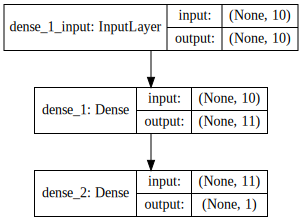

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.image as mpimg
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

OK, that is a rather simple model, but let's define a loss function, an optimizer, a performance metric and compile it:

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Training

In order to train the model, we pass the training data to the fit function. However, part of the training data will be used as validation data, which is used during the training to evaluate the training process. 

In [23]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=8)

Train on 278 samples, validate on 120 samples
Epoch 1/100
278/278 [==============================] - 0s 892us/step - loss: 0.6721 - acc: 0.5935 - val_loss: 0.5730 - val_acc: 0.8167
Epoch 2/100
278/278 [==============================] - 0s 229us/step - loss: 0.5088 - acc: 0.8345 - val_loss: 0.4639 - val_acc: 0.9083
Epoch 3/100
278/278 [==============================] - 0s 226us/step - loss: 0.4219 - acc: 0.8885 - val_loss: 0.3929 - val_acc: 0.9167
Epoch 4/100
278/278 [==============================] - 0s 260us/step - loss: 0.3680 - acc: 0.9245 - val_loss: 0.3435 - val_acc: 0.9167
Epoch 5/100
278/278 [==============================] - 0s 225us/step - loss: 0.3304 - acc: 0.9317 - val_loss: 0.3066 - val_acc: 0.9333
Epoch 6/100
278/278 [==============================] - 0s 225us/step - loss: 0.3022 - acc: 0.9353 - val_loss: 0.2782 - val_acc: 0.9417
Epoch 7/100
278/278 [==============================] - 0s 221us/step - loss: 0.2806 - acc: 0.9353 - val_loss: 0.2559 - val_acc: 0.9333
Epoch 8/1

Epoch 61/100
278/278 [==============================] - 0s 249us/step - loss: 0.1342 - acc: 0.9640 - val_loss: 0.1113 - val_acc: 0.9417
Epoch 62/100
278/278 [==============================] - 0s 228us/step - loss: 0.1336 - acc: 0.9676 - val_loss: 0.1111 - val_acc: 0.9417
Epoch 63/100
278/278 [==============================] - 0s 207us/step - loss: 0.1331 - acc: 0.9676 - val_loss: 0.1109 - val_acc: 0.9417
Epoch 64/100
278/278 [==============================] - 0s 221us/step - loss: 0.1326 - acc: 0.9676 - val_loss: 0.1107 - val_acc: 0.9417
Epoch 65/100
278/278 [==============================] - 0s 219us/step - loss: 0.1323 - acc: 0.9676 - val_loss: 0.1106 - val_acc: 0.9417
Epoch 66/100
278/278 [==============================] - 0s 204us/step - loss: 0.1317 - acc: 0.9676 - val_loss: 0.1104 - val_acc: 0.9417
Epoch 67/100
278/278 [==============================] - 0s 200us/step - loss: 0.1312 - acc: 0.9676 - val_loss: 0.1102 - val_acc: 0.9417
Epoch 68/100
278/278 [==========================

During the training process we have saved the loss and the accuracy of the training and validation data:

In [24]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


We can now plot the loss evolution over the training epochs for the training and validation dataset:

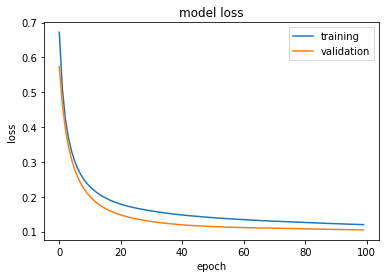

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Similarly, we can plot the accuracy 

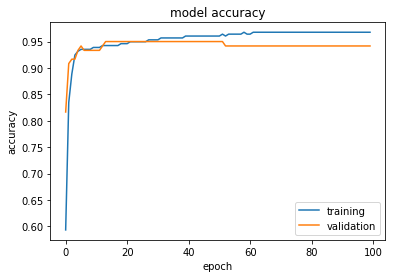

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

### Evaluation

Let's evaluate the loss and accuracy on our test data:

In [27]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=8)
print loss_and_metrics

171/171 [==============================] - 0s 99us/step
[0.16818849265313984, 0.93567251479416558]


Let's predict classes for our test data:

In [28]:
print 'Testing...'
y_pred = model.predict(X_test, verbose = True, batch_size=8)

Testing...
171/171 [==============================] - 0s 112us/step


In [29]:
# predictions
y_pred

array([[  2.46911887e-02],
       [  6.41295671e-01],
       [  9.16472256e-01],
       [  3.35365476e-05],
       [  1.07638262e-01],
       [  4.39718086e-03],
       [  9.99759257e-01],
       [  1.58661097e-01],
       [  9.68111098e-01],
       [  4.81340479e-09],
       [  9.99706089e-01],
       [  9.91387069e-01],
       [  1.16191812e-01],
       [  9.10929143e-01],
       [  9.95714128e-01],
       [  8.39511573e-01],
       [  5.38001861e-03],
       [  3.64673324e-02],
       [  6.35645390e-01],
       [  9.88984287e-01],
       [  9.31416512e-01],
       [  9.73866880e-01],
       [  9.72761154e-01],
       [  1.99083192e-03],
       [  4.01586201e-03],
       [  9.21817064e-01],
       [  9.96057987e-01],
       [  9.90339577e-01],
       [  9.00548825e-04],
       [  1.30316173e-03],
       [  9.06694591e-01],
       [  8.41965899e-03],
       [  7.86374390e-01],
       [  9.91148591e-01],
       [  2.13338208e-05],
       [  9.49174106e-01],
       [  6.65358901e-01],
 

### Task 3: Plot the output prediction for malignant and benign breast cancer showing the separation between these two classes.

(array([ 55.,   5.,   2.,   3.,   2.,   3.,   5.,   4.,   8.,  84.]),
 array([  2.31159447e-09,   9.99981186e-02,   1.99996235e-01,
          2.99994351e-01,   3.99992467e-01,   4.99990584e-01,
          5.99988700e-01,   6.99986816e-01,   7.99984932e-01,
          8.99983049e-01,   9.99981165e-01]),
 <a list of 10 Patch objects>)

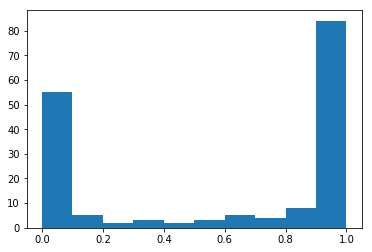

In [30]:
plt.hist(y_pred)

Text(0,0.5,u'Number of entries')

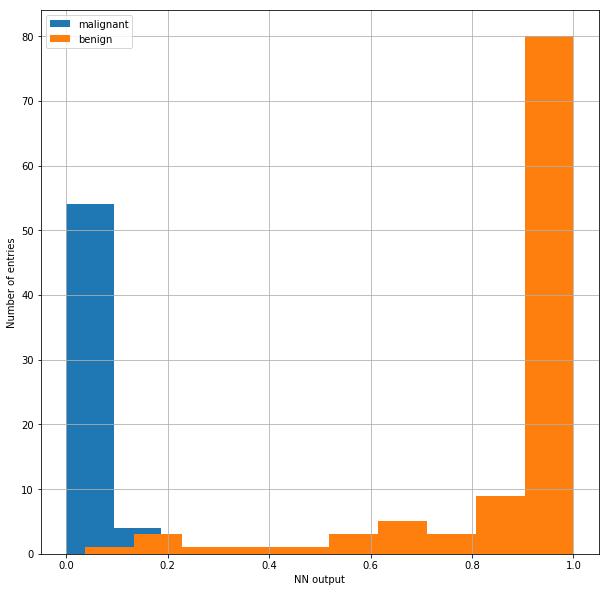

In [31]:
nn_out = pd.DataFrame()
nn_out = nn_out.assign(prediction = y_pred.ravel())
nn_out = nn_out.assign(target = y_test)
nn_out.groupby("target")["prediction"].hist(normed=1,figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper left')
plt.xlabel('NN output')
plt.ylabel('Number of entries')

Text(0,0.5,u'Density')

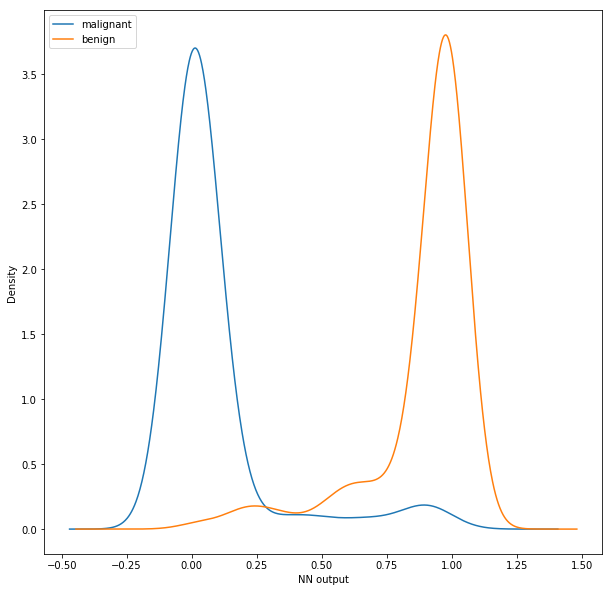

In [32]:
nn_out = pd.DataFrame()
nn_out = nn_out.assign(prediction = y_pred.ravel())
nn_out = nn_out.assign(target = y_test)
nn_out.groupby("target")["prediction"].plot(kind='kde', figsize=(10, 10))
plt.legend(['malignant', 'benign'], loc='upper left')
plt.xlabel('NN output')
plt.ylabel('Density')

How do we decide now to which class the test example needs to assigned based on our prediction? Intuitively, we could simply convert our predictions into classes by using a threshold of 0.5:

In [33]:
y_cls=np.where(y_pred > 0.5, 1, 0)
print y_cls

[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [34]:
y_cls = model.predict_classes(X_test, batch_size=1)
print y_cls

[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]


### Task 4: Use the scikit learn metrics to evaluate the model

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
print('Accuracy: %.2f' % accuracy_score(y_test, y_cls))
print("Precision: %.2f" % precision_score(y_test, y_cls, average='weighted'))
print("Recall: %.2f" % recall_score(y_test, y_cls, average='weighted'))
print 'Classification Report:\n', classification_report(y_test, y_cls)

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92        64
          1       0.96      0.93      0.95       107

avg / total       0.94      0.94      0.94       171



Now, let's use scikit learn also to plot the ROC curve and calculate the AUC:

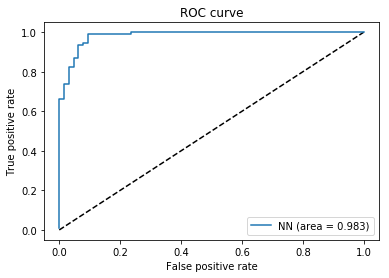

In [36]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred.ravel())
auc = auc(fpr, tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NN (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Task 5 (Bonus): Change the neural network model and study the impact on the performance
* Make the neural network wider
* Make the neural network deeper
* Change the activation function of the hidden nodes
* Change the activation function of the output node
* Change the loss function, which ones are allowed?
* Which neural network gives the best performance?